<h1> Machine learning algorithms</h1>
<h2> Linear regression</h2>
<h4> Example</h4>

Data:<br>
x = [147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183] <br>
y = [ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]

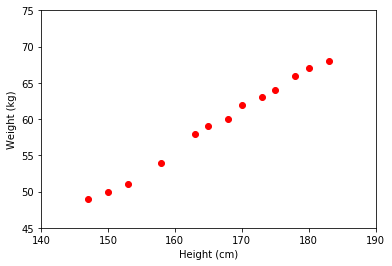

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


w =  [[-33.73541021]
 [  0.55920496]]


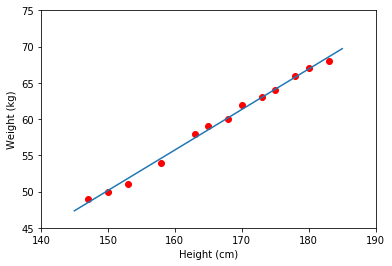

In [2]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


<h4> Prediction with input data and compare with the output and the real value</h4>

In [3]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


<h2> Apply Scikit-learn library</h2>

In [4]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]


<h1> K-mean clustering algorithm</h1>

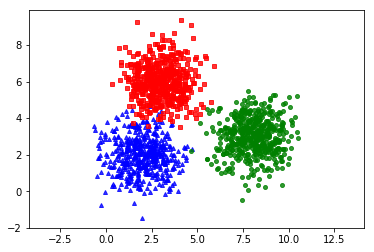

In [5]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

# we creat data by take the point follow the standard deviation with 
# coordinate: (2,2), (8,3), (3,6)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)


<h3> Created necessary functions of K-mean clustering </h3> 
1. <i>kmeans_init_centers </i> create initialize centers.<br>
2. <i>kmeans_asign_labels </i> assign label for data point when known centers.<br>
3. <i>kmeans_update_centers </i> update new centers based on the dataset was assigned before.<br>
4. <i>has_converged </i> check condition for stop algorithm.<br>

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


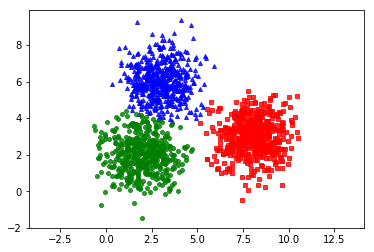

In [6]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

### main program
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])


<h2> Result can be find by scikit-learn library</h2>

Centers found by scikit-learn:
[[8.0410628  3.02094748]
 [2.99357611 6.03605255]
 [1.97634981 2.01123694]]


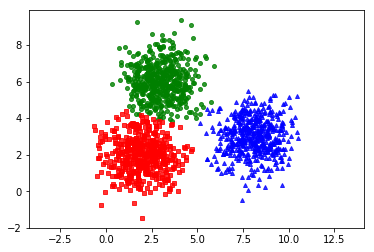

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

<h2> Clustering handwritten with MNIST dataset</h2>


In [16]:
# %reset
import numpy as np 
from mnist import MNIST # require `pip install python-mnist`
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from display_network import *
import numpy as np 
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
#import mnist as MNIST

#from loader import MNIST
mndata = MNIST('./mnist/')
mndata.load_testing()
X = mndata.test_images
X0 = np.asarray(X)[:1000,:]/256.0
X = X0
K = 10
kmeans = KMeans(n_clusters=K).fit(X)

pred_label = kmeans.predict(X)


<class 'numpy.ndarray'>
(784, 10)


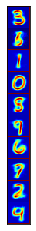

c:\users\dovan\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [19]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')


# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

# map the normalized data to colors
# image is now RGBA (512x512x4) 
image = cmap(norm(A))

import scipy.misc
scipy.misc.imsave('aa.png', image)
#scipy.misc.imageio.imwrite('aa.png', image)

Chose some pictures from each cluster

In [20]:
print(type(pred_label))
print(pred_label.shape)
print(type(X0))

<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>


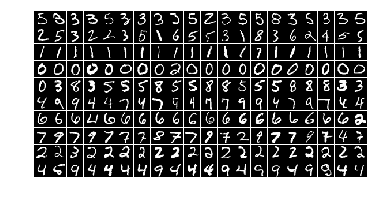

In [21]:
N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[pred_label == k, :]

    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(N0).fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, N0)
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]
    
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

<h2> Segmentation and Compression</h2>

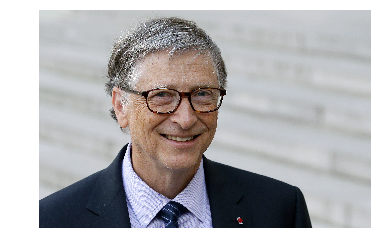

In [24]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

img = mpimg.imread('segmentation.jpg')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

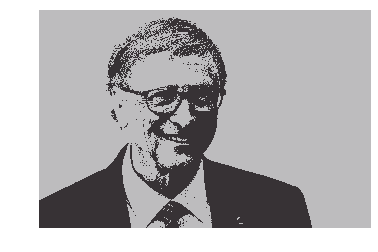

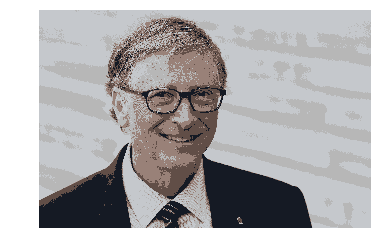

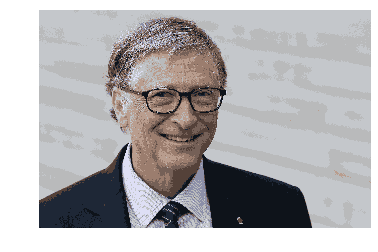

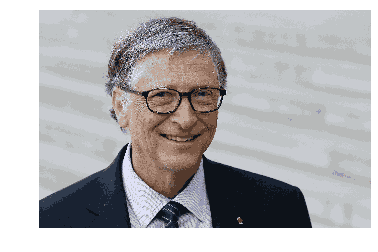

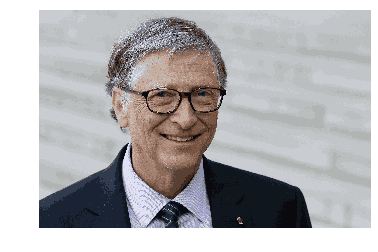

In [25]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

## For different K clusters
for K in [2, 5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    #replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    #reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()


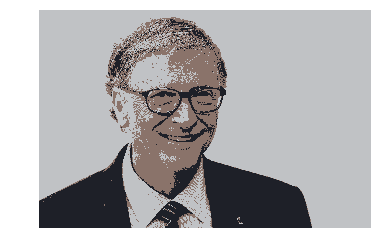

In [26]:
for K in [3]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()

<h1> K-nearest neighbor algorithm</h1><br><br>
We use library <i><strong>scikit-learn</strong></i><br>
Link download library: <href>https://scikit-learn.org/stable/</href>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print ('Number of classes: %d' %len(np.unique(iris_y)))
print ('Number of data points: %d' %len(iris_y))


X0 = iris_X[iris_y == 0,:]
print ('\nSamples from class 0:\n', X0[:5,:])

X1 = iris_X[iris_y == 1,:]
print ('\nSamples from class 1:\n', X1[:5,:])

X2 = iris_X[iris_y == 2,:]
print ('\nSamples from class 2:\n', X2[:5,:])

Number of classes: 3
Number of data points: 150

Samples from class 0:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Samples from class 1:
 [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]

Samples from class 2:
 [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]


<h3>Separate training and test sets</h3>

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     iris_X, iris_y, test_size=50)

print ("Training size: %d" %len(y_train))
print ("Test size    : %d" %len(y_test))

Training size: 100
Test size    : 50


In [29]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Print results for 20 test data points:")
print ("Predicted labels: ", y_pred[20:40])
print ("Ground truth    : ", y_test[20:40])

Print results for 20 test data points:
Predicted labels:  [0 1 2 0 2 1 0 2 2 2 1 2 1 1 2 1 2 2 2 2]
Ground truth    :  [0 1 2 0 2 2 0 2 2 2 1 2 1 1 2 1 2 2 2 2]


Evaluation method

In [30]:
from sklearn.metrics import accuracy_score
print ("Accuracy of 1NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 1NN: 94.00 %


In [31]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN with major voting: 96.00 %


Evaluate ratio for the closet points

In [32]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2, weights = 'distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 10NN (1/distance weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN (1/distance weights): 96.00 %


In [33]:
def myweight(distances):
    sigma2 = .5 # we can change this number
    return np.exp(-distances**2/sigma2)

clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2, weights = myweight)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 10NN (customized weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN (customized weights): 96.00 %


Testing with MNIST dataset 

In [34]:
# %reset
import numpy as np 
from mnist import MNIST # require `pip install python-mnist`
# https://pypi.python.org/pypi/python-mnist/

import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import accuracy_score
import time

# you need to download the MNIST dataset first
# at: http://yann.lecun.com/exdb/mnist/
mndata = MNIST('./mnist/') # path to your MNIST folder 
mndata.load_testing()
mndata.load_training()
X_test = mndata.test_images
X_train = mndata.train_images
y_test = np.asarray(mndata.test_labels)
y_train = np.asarray(mndata.train_labels)


start_time = time.time()
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end_time = time.time()
print ("Accuracy of 1NN for MNIST: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
print ("Running time: %.2f (s)" % (end_time - start_time))

Accuracy of 1NN for MNIST: 96.91 %
Running time: 560.83 (s)


<h2> Naive bayes classifier</h2>


The dataset is refered from http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex6/ex6.html

In [35]:
## packages 
from __future__ import division, print_function, unicode_literals
import numpy as np
from scipy.sparse import coo_matrix # for sparse matrix
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score # for evaluating results

# data path and file name 
path = 'data_naive_bayes/'
train_data_fn = 'train-features.txt'
test_data_fn = 'test-features.txt'
train_label_fn = 'train-labels.txt'
test_label_fn = 'test-labels.txt'

In [36]:
nwords = 2500 

def read_data(data_fn, label_fn):
    ## read label_fn
    with open(path + label_fn) as f:
        content = f.readlines()
    label = [int(x.strip()) for x in content]

    ## read data_fn
    with open(path + data_fn) as f:
        content = f.readlines()
    # remove '\n' at the end of each line
    content = [x.strip() for x in content] 

    dat = np.zeros((len(content), 3), dtype = int)
    
    for i, line in enumerate(content): 
        a = line.split(' ')
        dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2])])
    
    # remember to -1 at coordinate since we're in Python
    # check this: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html
    # for more information about coo_matrix function 
    data = coo_matrix((dat[:, 2], (dat[:, 0] - 1, dat[:, 1] - 1)),\
             shape=(len(label), nwords))
    return (data, label)

In [37]:
(train_data, train_label)  = read_data(train_data_fn, train_label_fn)
(test_data, test_label)  = read_data(test_data_fn, test_label_fn)

clf = MultinomialNB()
clf.fit(train_data, train_label)

y_pred = clf.predict(test_data)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_data.shape[0],accuracy_score(test_label, y_pred)*100))

Training size = 700, accuracy = 98.08%


In [38]:
train_data_fn = 'train-features-100.txt'
train_label_fn = 'train-labels-100.txt'
test_data_fn = 'test-features.txt'
test_label_fn = 'test-labels.txt'

(train_data, train_label)  = read_data(train_data_fn, train_label_fn)
(test_data, test_label)  = read_data(test_data_fn, test_label_fn)
clf = MultinomialNB()
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_data.shape[0],accuracy_score(test_label, y_pred)*100))

Training size = 100, accuracy = 97.69%


In [39]:
train_data_fn = 'train-features-50.txt'
train_label_fn = 'train-labels-50.txt'
test_data_fn = 'test-features.txt'
test_label_fn = 'test-labels.txt'

(train_data, train_label)  = read_data(train_data_fn, train_label_fn)
(test_data, test_label)  = read_data(test_data_fn, test_label_fn)
clf = MultinomialNB()
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_data.shape[0],accuracy_score(test_label, y_pred)*100))

Training size = 50, accuracy = 97.31%


In [40]:
clf = BernoulliNB(binarize = .5)
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_data.shape[0],accuracy_score(test_label, y_pred)*100))

Training size = 50, accuracy = 69.62%


<h2>Overfitting</h2>

(20, 1) (20, 1)


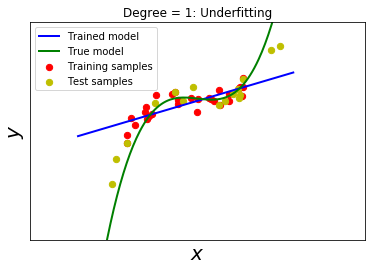

[[-41.90206792  12.66196586]]
(20, 1) (20, 1)


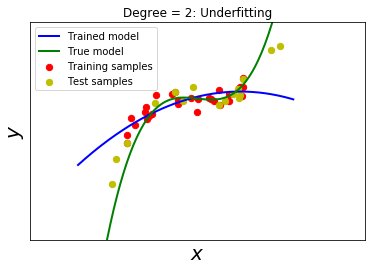

[[-52.79321911  27.33320281  -2.85491906]]
(20, 1) (20, 1)


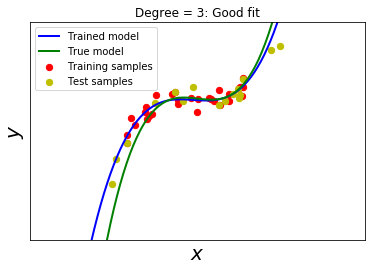

[[-70.86022078  78.7687132  -28.99387406   3.4286372 ]]
(20, 1) (20, 1)


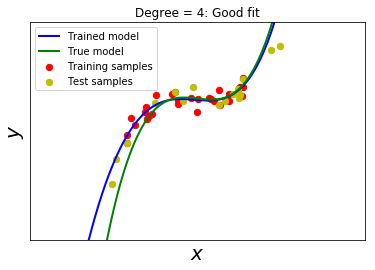

[[-70.11099235  74.66197229 -24.91080481   2.11241837   0.13285956]]
(20, 1) (20, 1)


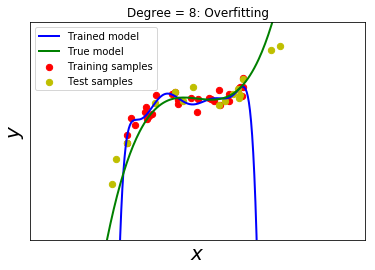

[[-8.31452004e+01  3.47714187e+02 -1.03309551e+03  1.48372383e+03
  -1.08580923e+03  4.36091506e+02 -9.77083149e+01  1.14715264e+01
  -5.50276444e-01]]
(20, 1) (20, 1)


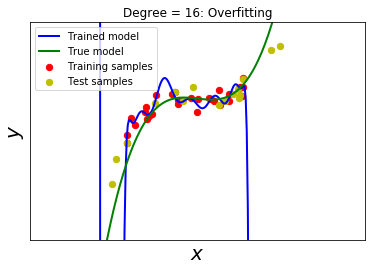

[[-1.13972143e+02  1.48509531e+03 -1.06959953e+04  3.60292183e+04
  -6.18737139e+04  5.04161834e+04 -1.05532643e+03 -3.90923449e+04
   4.21730732e+04 -2.45089752e+04  9.16646978e+03 -2.30845624e+03
   3.91275970e+02 -4.30326183e+01  2.80078360e+00 -8.49953122e-02
   3.07303406e-04]]


In [42]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(4)
from sklearn import datasets, linear_model

N = 30
N_test = 20 
X = np.random.rand(N, 1)*5
y = 3*(X -2) * (X - 3)*(X-4) +  10*np.random.randn(N, 1)

X_test = (np.random.rand(N_test,1) - 1/8) *10
y_test = 3*(X_test -2) * (X_test - 3)*(X_test-4) +  10*np.random.randn(N_test, 1)

def buildX(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in range(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res 

def myfit(X, y, d):
    Xbar = buildX(X, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)

    w = regr.coef_
    # Display result
    w_0 = w[0][0]
    w_1 = w[0][1]
    x0 = np.linspace(-2, 7, 200, endpoint=True)
    y0 = np.zeros_like(x0)
    ytrue = 5*(x0 - 2)*(x0-3)*(x0-4)
    for i in range(d+1):
        y0 += w[0][i]*x0**i

    # Draw the fitting line 
    plt.scatter(X.T, y.T, c = 'r', s = 40, label = 'Training samples')     # data 
    print(X_test.shape, y_test.shape)
    plt.scatter(X_test.T, y_test.T, c = 'y', s = 40, label = 'Test samples')     # data 
    
    plt.plot(x0, y0, 'b', linewidth = 2, label = "Trained model")   # the fitting line
    plt.plot(x0, ytrue, 'g', linewidth = 2, label = "True model")   # the fitting line
    plt.xticks([], [])
    plt.yticks([], [])
    if d < 3:
        str1 = 'Underfitting'
    elif d > 4:
        str1 = 'Overfitting'
    else:
        str1 = 'Good fit'
    str0 = 'Degree = ' + str(d) + ': ' + str1
    plt.title(str0)
    plt.axis([-4, 10, np.amin(y_test) - 100, np.amax(y) + 100])
    plt.legend(loc="best")
    
    fn = 'linreg_' + str(d) + '.png'
    
    plt.xlabel('$x$', fontsize = 20);
    plt.ylabel('$y$', fontsize = 20);
    
    plt.savefig(fn, bbox_inches='tight', dpi = 600)
    
    plt.show()
    print(w)

myfit(X, y, 1)
myfit(X, y, 2)
myfit(X, y, 3)
myfit(X, y, 4)
myfit(X, y, 8)
myfit(X, y, 16)

<h2> Validation </h2>

49


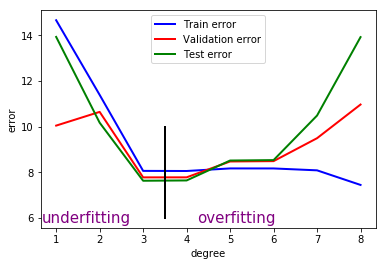

In [46]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(5)
from sklearn import datasets, linear_model

N = 50
N_test = 10 
X = np.random.rand(N, 1)*5
y = 3*(X -2) * (X - 3)*(X-4) +  10*np.random.randn(N, 1)

# split train to train + valid use train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split( \
     X, y, test_size=0.33, random_state=0)

# generate test data
X_test = (np.random.rand(N_test,1)) *5
y_test = 3*(X_test -2) * (X_test - 3)*(X_test-4) +  10*np.random.randn(N_test, 1)

def buildX(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in range(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res 

def poly(a, x):
    """
    return a[0] + a[1]*x + a[2]*x**2 + .... 
    """
    res = np.zeros_like(x)
    for i in range(len(a) - 1, -1, -1):
        res = res*x + a[i] 
    return res 

x = 2
a = [1, 2, 3, 4]
print(poly(a, x))

def MSE(x, y, w):     
    d = len(w) - 1
    y_pred = poly(w, x)
    return np.mean(np.abs(y - y_pred))

def myfit(d):
    Xbar = buildX(X_train, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y_train)

    w = regr.coef_[0]
    train_err = MSE(X_train, y_train, w)
    valid_err = MSE(X_valid, y_valid, w)
    test_err = MSE(X_test, y_test, w)
                    
    return (train_err, valid_err, test_err)
    
    
Train_error = []
Test_error = []
Valid_error = []
degree = 9
for d in range(1, degree):
    (train_err, valid_err, test_err) = myfit(d) 
    Train_error.append(train_err)
    Test_error.append(test_err)
    Valid_error.append(valid_err)

degree = range(1, degree)

fig = plt.figure()
# fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)

plt.plot(degree, Train_error, 'b-', linewidth = 2, label = "Train error")
plt.plot(degree, Valid_error, 'r-', linewidth = 2, label = "Validation error")
plt.plot(degree, Test_error, 'g-', linewidth = 2, label = "Test error")
plt.legend(loc="best")
plt.xlabel('degree')
plt.ylabel('error')


plt.plot([3.5, 3.5], [6, 10], color='k', linestyle='-', linewidth=2)
ax.text(0.7, 0.01, 'overfitting',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='purple', fontsize=15)
ax.text(0.27, 0.01, 'underfitting',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='purple', fontsize=15)
plt.savefig('linreg_val.png', bbox_inches='tight', dpi = 600)
plt.show()